In [1]:
import csv
import pandas as pd

In [2]:
from dotenv import load_dotenv
import os
import json
load_dotenv(override=True)

import time
from datetime import datetime, timedelta

In [3]:
USER = os.getenv("USER")
PASSWORD = os.getenv("PASSWORD")

In [4]:
# connect to db
import mysql.connector

mydb = mysql.connector.connect(
  host="127.0.0.1",
  user=USER,
  password=PASSWORD,
  database="mpp21"
)

mycursor = mydb.cursor()

In [5]:
def select_articles(curs, db, n):
    
    curs.execute("""SELECT article_id, date 
                FROM articles 
                WHERE newspaper = '""" + n + """' 
                AND is_privacy = 'privacy'
                """)
    
    arts = {}
    result = curs.fetchall()
    for r in result:
        arts[r[0]] = r[1]
    
    return arts

In [6]:
# group per week

weeks = []

timeframe_start = datetime.date(datetime(2010,12,27)) # monday
timeframe_end = datetime.date(datetime(2020,12,31))

dt = timeframe_start

ctr = 0 

while dt <= timeframe_end:
    
    weeks.append((ctr, dt, dt + timedelta(days=6))) # (start, end)
    dt += timedelta(days=7) # move to next week
    ctr += 1


In [7]:
timeframe_start = '2011-01-01'
timeframe_end = '2020-12-31'

In [8]:
from collections import defaultdict

In [9]:
import matplotlib.pyplot as plt

In [10]:
def group_by_week(ds):
    
    group = defaultdict(lambda: 0)
    
    for w in range(len(weeks)):
        
        for i in ds.values():

            if i >= weeks[w][1] and i <= weeks[w][2]:
               
                group[w] += 1
        
    return group



In [11]:
newspapers = {}

with open('./newspapers-collected.csv', 'r') as f:
        reader = csv.reader(f)
        for r in reader:
            newspapers[r[0]] = r[1]

In [12]:
# function to get week number of given date

def get_week_for_date(d):
    
    for w in weeks:
        if d >= w[1] and d <= w[2]:
            return(w[0])
        
# function to get month number of given date

def get_month_for_date(d):
    
    for m in months:
        if d >= m[1] and d <= m[2]:
            return(m[0])

In [13]:
#x = get_week_for_date(datetime.date(datetime(2011,1,11)))

In [14]:
dates = {}

for n in newspapers.keys():
    dates[n] = select_articles(mycursor, mydb, n)
    print(n, len(dates[n]))

USA 1476
GM 2271
DT 2295
AFR 1602
NZH 2903
TS 3296
SMH 1700
NYT 2501
TDP 1227
TG 7435


In [15]:
groups = {}

for n in newspapers.keys():
    groups[n] = group_by_week(dates[n])

In [16]:
xs = [i[0] for i in weeks]
ys = {}

for n in newspapers.keys():
    ys[n] = [groups[n][i[0]] for i in weeks]

In [17]:
#x = [i[0] for i in weeks]###[i[1] for i in weeks] # first day of the week
#y = [groups[i[0]] for i in weeks] # counts of articles for that week

In [18]:
colors = {
    "AFR": "#87111d", 
    "SMH": "darkblue",
    "NZH": "#87111d",
    "TDP": "darkblue", 
    "GM": "#87111d",
    "TS": "darkblue",
    "NYT": "#87111d",
    "USA": "darkblue",
    "TG": "#87111d",
    "DT": "darkblue"
} ##87111d

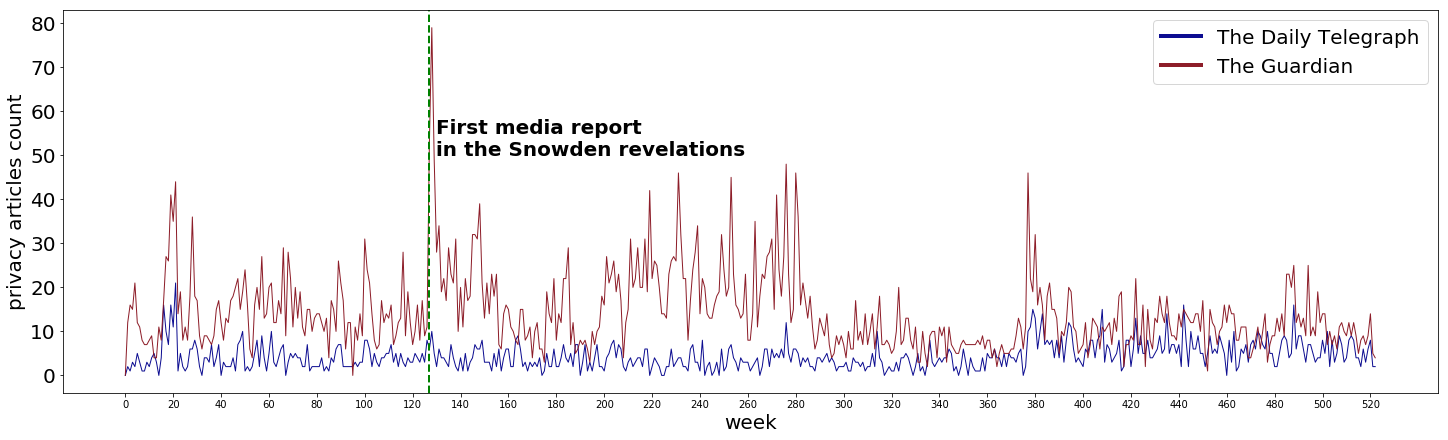

In [19]:
fig,ax = plt.subplots(figsize=(20, 6), constrained_layout=True)

us = ["NYT", "USA"]
gb = ["DT", "TG"]
au = ["AFR", "SMH"]
nz = ["NZH", "TDP"]
ca = ["GM", "TS"]

country = gb
for i in country:
    plt.plot(xs, ys[i], color=colors[i], alpha=0.95, linewidth=1)

    
max_y = max(max(ys[country[0]]), max(ys[country[1]])) + 10
# plot and annotate dates
snowden = get_week_for_date(datetime.date(datetime(2013,6,6)))
plt.axvline(snowden, 0, linestyle="--", color="green", linewidth=2)
ax.annotate(" First media report\n in the Snowden revelations", [snowden, 50], fontsize=20, fontweight="bold")


ax.set_xticks(range(0, 522, 20))
ax.set_xlabel('week', fontsize=20)
ax.set_yticklabels(range(0, 522, 20), fontsize=20)

ax.set_ylabel("privacy articles count", fontsize=20)
ax.set_yticks(range(0, max_y, 10))
ax.set_yticklabels(range(0, max_y, 10), fontsize=20)
# ax.set_xticklabels(epochs, fontsize=20) 
legend = ax.legend(["The Daily Telegraph", "The Guardian"], loc=1, fontsize=20)

for line in legend.get_lines():
    line.set_linewidth(4.0)

plt.show()

In [20]:
# SAME BUT FOR MONTHS (manually defined)

In [21]:
def group_by_month(ds):
    
    group = defaultdict(lambda: 0)
    
    for m in range(len(months)):
        
        for i in ds.values():

            if i >= months[m][1] and i <= months[m][2]:
               
                group[m] += 1
        
    return group



In [24]:
month_groups = {}

for n in newspapers.keys():
    month_groups[n] = group_by_month(dates[n])

In [25]:
month_xs = [i[0] for i in months]
month_ys = {}

for n in newspapers.keys():
    month_ys[n] = [month_groups[n][i[0]] for i in months]

In [40]:
import matplotlib.dates as mdates

In [27]:
colors = {
    "AFR": "#dd8211", 
    "SMH": "#0e8c8c",
    "NZH": "#dd8211",
    "TDP": "#0e8c8c", 
    "GM": "#dd8211",
    "TS": "#0e8c8c",
    "NYT": "#dd8211",
    "USA": "#0e8c8c",
    "TG": "#dd8211",
    "DT": "#0e8c8c",
    "line": "black"
} ##87111d

In [28]:
names = {
    "AFR": "Australian Financial Review", 
    "SMH": "Sydney Morning Herald",
    "NZH": "The New Zealand Herald",
    "TDP": "The Dominion Post", 
    "GM": "The Globe and Mail",
    "TS": "The Toronto Star",
    "NYT": "The New York Times",
    "USA": "USA Today",
    "TG": "The Guardian",
    "DT": "The Daily Telegraph",
}

linestyles = {
    "AFR": "--", 
    "SMH": "-",
    "NZH": "--",
    "TDP": "-", 
    "GM": "--",
    "TS": "-",
    "NYT": "--",
    "USA": "-",
    "TG": "-",
    "DT": "--",
}

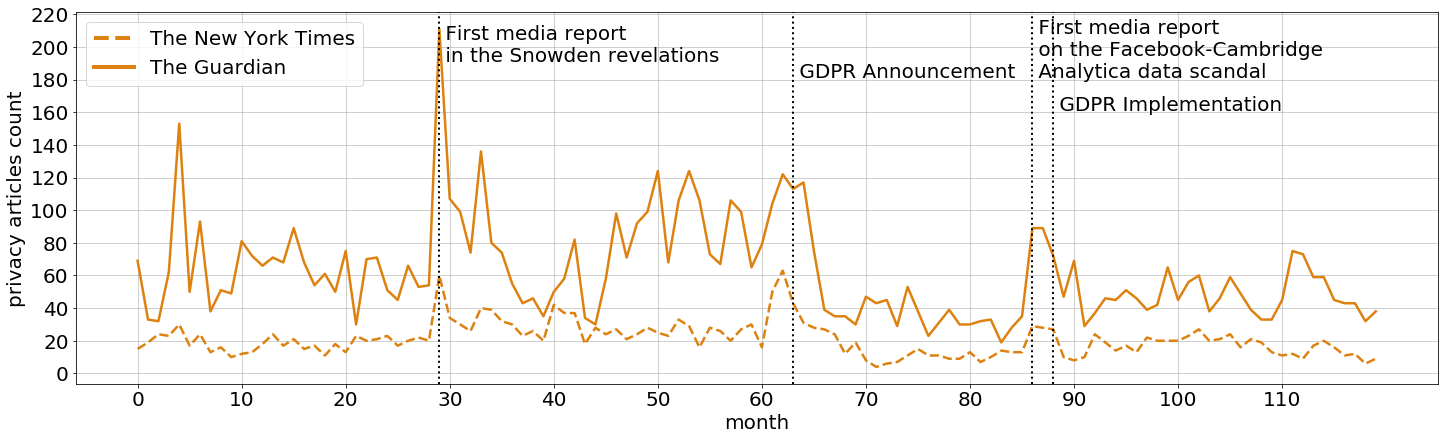

In [29]:
fig,ax = plt.subplots(figsize=(20, 6), constrained_layout=True)

us = ["NYT", "USA"]
gb = ["DT", "TG"]
au = ["AFR", "SMH"]
nz = ["NZH", "TDP"]
ca = ["GM", "TS"]

country = ["NYT", "TG"]#us
for i in country:
    plt.plot(month_xs, month_ys[i], color=colors[i], alpha=1, linewidth=2.5, linestyle=linestyles[i])

    
max_y = max(max(month_ys[country[0]]), max(month_ys[country[1]])) + 10
# plot and annotate dates
snowden = get_month_for_date(datetime.date(datetime(2013,6,6)))
plt.axvline(snowden, 0, linestyle=":", 
            color=colors["line"], linewidth=2)
ax.annotate(" First media report\n in the Snowden revelations", 
            [snowden, max_y - 30], fontsize=20)#, fontweight="bold")

cambridge_analytica = get_month_for_date(datetime.date(datetime(2018,3,1)))
plt.axvline(cambridge_analytica, 0, linestyle=":", 
            color=colors["line"], linewidth=2)
ax.annotate(" First media report\n on the Facebook-Cambridge\n Analytica data scandal", 
            [cambridge_analytica, max_y - 40], fontsize=20)#, fontweight="bold")

gdpr_1 = get_month_for_date(datetime.date(datetime(2016, 4, 14)))
plt.axvline(gdpr_1, 0, linestyle=":", 
            color=colors["line"], linewidth=2)
ax.annotate(" GDPR Announcement", 
            [gdpr_1, max_y - 40], fontsize=20)#, fontweight="bold")

gdpr_2 = get_month_for_date(datetime.date(datetime(2018, 5, 25)))
plt.axvline(gdpr_2, 0, linestyle=":", color=colors["line"], linewidth=2)
ax.annotate(" GDPR Implementation", 
            [gdpr_2, max_y - 60], fontsize=20)#, fontweight="bold")




ax.set_xticks(range(0, 120, 10))
ax.set_xlabel('month', fontsize=20)
ax.set_xticklabels(range(0, 120, 10), fontsize=20)

ax.set_ylabel("privacy articles count", fontsize=20)
ax.set_yticks(range(0, max_y, 20))
ax.set_yticklabels(range(0, max_y, 20), fontsize=20)
# ax.set_xticklabels(epochs, fontsize=20) 
legend = ax.legend([names[country[0]], names[country[1]]], loc=2, fontsize=20)
#ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=6))
#ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b%y"))

for line in legend.get_lines():
    line.set_linewidth(4.0)
plt.grid(alpha=0.75)
plt.show()

In [30]:
def select_articles_all(curs, db):
    
    curs.execute("""SELECT article_id, date 
                FROM articles 
                WHERE is_privacy = 'privacy'
                """)
    
    arts = {}
    result = curs.fetchall()
    for r in result:
        arts[r[0]] = r[1]
    
    return arts

In [33]:
dates_all = select_articles_all(mycursor, mydb)
print(len(dates_all))

26706


In [34]:
month_groups_all = group_by_month(dates_all)

In [37]:
month_xs_all = [i[0] for i in months]
month_ys_all = [month_groups_all[i[0]] for i in months]

In [65]:
import numpy as np

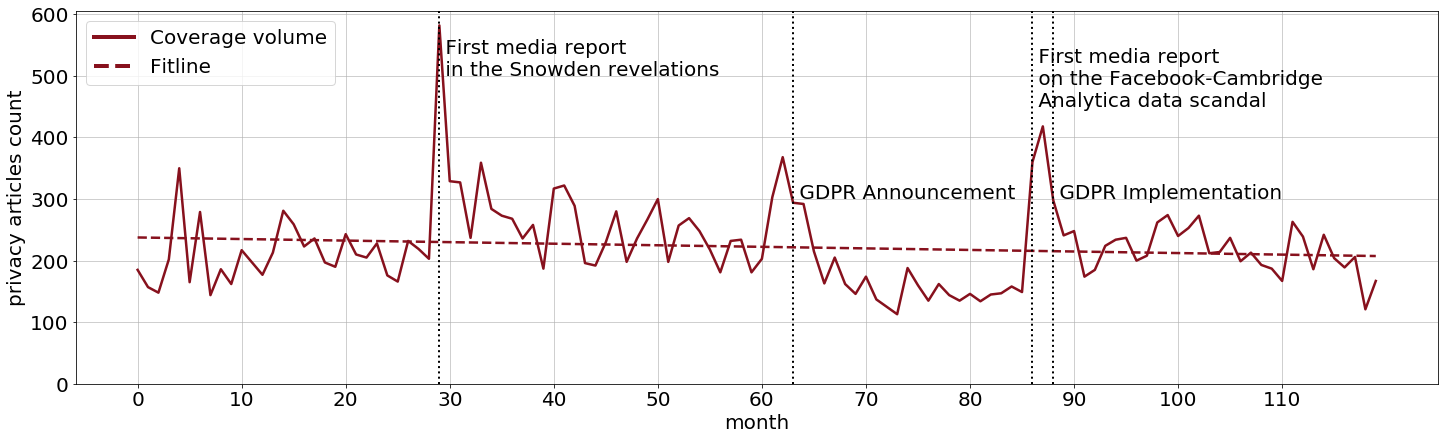

In [87]:
fig,ax = plt.subplots(figsize=(20, 6), constrained_layout=True)

plt.plot(month_xs_all, month_ys_all, color="#87111d", alpha=1, linewidth=2.5)

# plot fitline
plt.plot(np.unique(month_xs_all), 
         np.poly1d(np.polyfit(month_xs_all, month_ys_all, 1))(np.unique(month_xs_all)),
        color="#87111d", linewidth=2.5, linestyle="--")
    
max_y = max(month_ys_all) + 100
# plot and annotate dates
snowden = get_month_for_date(datetime.date(datetime(2013,6,6)))
plt.axvline(snowden, 0, linestyle=":", 
            color=colors["line"], linewidth=2)
ax.annotate(" First media report\n in the Snowden revelations", 
            [snowden, 500], fontsize=20)#, fontweight="bold")

cambridge_analytica = get_month_for_date(datetime.date(datetime(2018,3,1)))
plt.axvline(cambridge_analytica, 0, linestyle=":", 
            color=colors["line"], linewidth=2)
ax.annotate(" First media report\n on the Facebook-Cambridge\n Analytica data scandal", 
            [cambridge_analytica, 450], fontsize=20)#, fontweight="bold")

gdpr_1 = get_month_for_date(datetime.date(datetime(2016, 4, 14)))
plt.axvline(gdpr_1, 0, linestyle=":", 
            color=colors["line"], linewidth=2)
ax.annotate(" GDPR Announcement", 
            [gdpr_1, 300], fontsize=20)#, fontweight="bold")

gdpr_2 = get_month_for_date(datetime.date(datetime(2018, 5, 25)))
plt.axvline(gdpr_2, 0, linestyle=":", color=colors["line"], linewidth=2)
ax.annotate(" GDPR Implementation", 
            [gdpr_2, 300], fontsize=20)#, fontweight="bold")




ax.set_xticks(range(0, len(months), 10))
ax.set_xlabel('month', fontsize=20)
ax.set_xticklabels(range(0, 120, 10), fontsize=20)

ax.set_ylabel("privacy articles count", fontsize=20)
ax.set_yticks(range(0, max_y, 100))
ax.set_yticklabels(range(0, max_y, 100), fontsize=20)
# ax.set_xticklabels(epochs, fontsize=20) 
###legend = ax.legend([names[country[0]], names[country[1]]], loc=2, fontsize=20)
#ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=6))
#ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b%y"))


legend = ax.legend(["Coverage volume", "Fitline"], loc=2, fontsize=20)


for line in legend.get_lines():
    line.set_linewidth(4.0)
plt.grid(alpha=0.75)
plt.show()

In [93]:
# np.unique(month_xs_all)
# np.poly1d(np.polyfit(month_xs_all, month_ys_all, 1))
# np.unique(month_xs_all)

In [90]:
np.poly1d(np.polyfit(month_xs_all, month_ys_all, 1))


poly1d([ -0.25321203, 237.6161157 ])

In [23]:
# group per month
# week is more natural progression though, but let's see

months = [
    # 2011
    (0, datetime.date(datetime(2011, 1, 1)), datetime.date(datetime(2011, 1, 31))),
    (1, datetime.date(datetime(2011, 2, 1)), datetime.date(datetime(2011, 2, 28))),
    (2, datetime.date(datetime(2011, 3, 1)), datetime.date(datetime(2011, 3, 31))),
    (3, datetime.date(datetime(2011, 4, 1)), datetime.date(datetime(2011, 4, 30))),
    (4, datetime.date(datetime(2011, 5, 1)), datetime.date(datetime(2011, 5, 31))),
    (5, datetime.date(datetime(2011, 6, 1)), datetime.date(datetime(2011, 6, 30))),
    (6, datetime.date(datetime(2011, 7, 1)), datetime.date(datetime(2011, 7, 31))),
    (7, datetime.date(datetime(2011, 8, 1)), datetime.date(datetime(2011, 8, 31))),
    (8, datetime.date(datetime(2011, 9, 1)), datetime.date(datetime(2011, 9, 30))),
    (9, datetime.date(datetime(2011, 10, 1)), datetime.date(datetime(2011, 10, 31))),
    (10, datetime.date(datetime(2011, 11, 1)), datetime.date(datetime(2011, 11, 30))),
    (11, datetime.date(datetime(2011, 12, 1)), datetime.date(datetime(2011, 12, 31))), 
    # 2012
    (12, datetime.date(datetime(2012, 1, 1)), datetime.date(datetime(2012, 1, 31))),
    (13, datetime.date(datetime(2012, 2, 1)), datetime.date(datetime(2012, 2, 29))),
    (14, datetime.date(datetime(2012, 3, 1)), datetime.date(datetime(2012, 3, 31))),
    (15, datetime.date(datetime(2012, 4, 1)), datetime.date(datetime(2012, 4, 30))),
    (16, datetime.date(datetime(2012, 5, 1)), datetime.date(datetime(2012, 5, 31))),
    (17, datetime.date(datetime(2012, 6, 1)), datetime.date(datetime(2012, 6, 30))),
    (18, datetime.date(datetime(2012, 7, 1)), datetime.date(datetime(2012, 7, 31))),
    (19, datetime.date(datetime(2012, 8, 1)), datetime.date(datetime(2012, 8, 31))),
    (20, datetime.date(datetime(2012, 9, 1)), datetime.date(datetime(2012, 9, 30))),
    (21, datetime.date(datetime(2012, 10, 1)), datetime.date(datetime(2012, 10, 31))),
    (22, datetime.date(datetime(2012, 11, 1)), datetime.date(datetime(2012, 11, 30))),
    (23, datetime.date(datetime(2012, 12, 1)), datetime.date(datetime(2012, 12, 31))), # year
    # 2013
    (24, datetime.date(datetime(2013, 1, 1)), datetime.date(datetime(2013, 1, 31))),
    (25, datetime.date(datetime(2013, 2, 1)), datetime.date(datetime(2013, 2, 28))),
    (26, datetime.date(datetime(2013, 3, 1)), datetime.date(datetime(2013, 3, 31))),
    (27, datetime.date(datetime(2013, 4, 1)), datetime.date(datetime(2013, 4, 30))),
    (28, datetime.date(datetime(2013, 5, 1)), datetime.date(datetime(2013, 5, 31))),
    (29, datetime.date(datetime(2013, 6, 1)), datetime.date(datetime(2013, 6, 30))),
    (30, datetime.date(datetime(2013, 7, 1)), datetime.date(datetime(2013, 7, 31))),
    (31, datetime.date(datetime(2013, 8, 1)), datetime.date(datetime(2013, 8, 31))),
    (32, datetime.date(datetime(2013, 9, 1)), datetime.date(datetime(2013, 9, 30))),
    (33, datetime.date(datetime(2013, 10, 1)), datetime.date(datetime(2013, 10, 31))),
    (34, datetime.date(datetime(2013, 11, 1)), datetime.date(datetime(2013, 11, 30))),
    (35, datetime.date(datetime(2013, 12, 1)), datetime.date(datetime(2013, 12, 31))), # year
    # 2014
    (36, datetime.date(datetime(2014, 1, 1)), datetime.date(datetime(2014, 1, 31))),
    (37, datetime.date(datetime(2014, 2, 1)), datetime.date(datetime(2014, 2, 28))),
    (38, datetime.date(datetime(2014, 3, 1)), datetime.date(datetime(2014, 3, 31))),
    (39, datetime.date(datetime(2014, 4, 1)), datetime.date(datetime(2014, 4, 30))),
    (40, datetime.date(datetime(2014, 5, 1)), datetime.date(datetime(2014, 5, 31))),
    (41, datetime.date(datetime(2014, 6, 1)), datetime.date(datetime(2014, 6, 30))),
    (42, datetime.date(datetime(2014, 7, 1)), datetime.date(datetime(2014, 7, 31))),
    (43, datetime.date(datetime(2014, 8, 1)), datetime.date(datetime(2014, 8, 31))),
    (44, datetime.date(datetime(2014, 9, 1)), datetime.date(datetime(2014, 9, 30))),
    (45, datetime.date(datetime(2014, 10, 1)), datetime.date(datetime(2014, 10, 31))),
    (46, datetime.date(datetime(2014, 11, 1)), datetime.date(datetime(2014, 11, 30))),
    (47, datetime.date(datetime(2014, 12, 1)), datetime.date(datetime(2014, 12, 31))),
    # 2015
    (48, datetime.date(datetime(2015, 1, 1)), datetime.date(datetime(2015, 1, 31))),
    (49, datetime.date(datetime(2015, 2, 1)), datetime.date(datetime(2015, 2, 28))),
    (50, datetime.date(datetime(2015, 3, 1)), datetime.date(datetime(2015, 3, 31))),
    (51, datetime.date(datetime(2015, 4, 1)), datetime.date(datetime(2015, 4, 30))),
    (52, datetime.date(datetime(2015, 5, 1)), datetime.date(datetime(2015, 5, 31))),
    (53, datetime.date(datetime(2015, 6, 1)), datetime.date(datetime(2015, 6, 30))),
    (54, datetime.date(datetime(2015, 7, 1)), datetime.date(datetime(2015, 7, 31))),
    (55, datetime.date(datetime(2015, 8, 1)), datetime.date(datetime(2015, 8, 31))),
    (56, datetime.date(datetime(2015, 9, 1)), datetime.date(datetime(2015, 9, 30))),
    (57, datetime.date(datetime(2015, 10, 1)), datetime.date(datetime(2015, 10, 31))),
    (58, datetime.date(datetime(2015, 11, 1)), datetime.date(datetime(2015, 11, 30))),
    (59, datetime.date(datetime(2015, 12, 1)), datetime.date(datetime(2015, 12, 31))),
    # 2016
    (60, datetime.date(datetime(2016, 1, 1)), datetime.date(datetime(2016, 1, 31))),
    (61, datetime.date(datetime(2016, 2, 1)), datetime.date(datetime(2016, 2, 29))),
    (62, datetime.date(datetime(2016, 3, 1)), datetime.date(datetime(2016, 3, 31))),
    (63, datetime.date(datetime(2016, 4, 1)), datetime.date(datetime(2016, 4, 30))),
    (64, datetime.date(datetime(2016, 5, 1)), datetime.date(datetime(2016, 5, 31))),
    (65, datetime.date(datetime(2016, 6, 1)), datetime.date(datetime(2016, 6, 30))),
    (66, datetime.date(datetime(2016, 7, 1)), datetime.date(datetime(2016, 7, 31))),
    (67, datetime.date(datetime(2016, 8, 1)), datetime.date(datetime(2016, 8, 31))),
    (68, datetime.date(datetime(2016, 9, 1)), datetime.date(datetime(2016, 9, 30))),
    (69, datetime.date(datetime(2016, 10, 1)), datetime.date(datetime(2016, 10, 31))),
    (70, datetime.date(datetime(2016, 11, 1)), datetime.date(datetime(2016, 11, 30))),
    (71, datetime.date(datetime(2016, 12, 1)), datetime.date(datetime(2016, 12, 31))), 
    # 2017
    (72, datetime.date(datetime(2017, 1, 1)), datetime.date(datetime(2017, 1, 31))),
    (73, datetime.date(datetime(2017, 2, 1)), datetime.date(datetime(2017, 2, 28))),
    (74, datetime.date(datetime(2017, 3, 1)), datetime.date(datetime(2017, 3, 31))),
    (75, datetime.date(datetime(2017, 4, 1)), datetime.date(datetime(2017, 4, 30))),
    (76, datetime.date(datetime(2017, 5, 1)), datetime.date(datetime(2017, 5, 31))),
    (77, datetime.date(datetime(2017, 6, 1)), datetime.date(datetime(2017, 6, 30))),
    (78, datetime.date(datetime(2017, 7, 1)), datetime.date(datetime(2017, 7, 31))),
    (79, datetime.date(datetime(2017, 8, 1)), datetime.date(datetime(2017, 8, 31))),
    (80, datetime.date(datetime(2017, 9, 1)), datetime.date(datetime(2017, 9, 30))),
    (81, datetime.date(datetime(2017, 10, 1)), datetime.date(datetime(2017, 10, 31))),
    (82, datetime.date(datetime(2017, 11, 1)), datetime.date(datetime(2017, 11, 30))),
    (83, datetime.date(datetime(2017, 12, 1)), datetime.date(datetime(2017, 12, 31))),
    # 2018
    (84, datetime.date(datetime(2018, 1, 1)), datetime.date(datetime(2018, 1, 31))),
    (85, datetime.date(datetime(2018, 2, 1)), datetime.date(datetime(2018, 2, 28))),
    (86, datetime.date(datetime(2018, 3, 1)), datetime.date(datetime(2018, 3, 31))),
    (87, datetime.date(datetime(2018, 4, 1)), datetime.date(datetime(2018, 4, 30))),
    (88, datetime.date(datetime(2018, 5, 1)), datetime.date(datetime(2018, 5, 31))),
    (89, datetime.date(datetime(2018, 6, 1)), datetime.date(datetime(2018, 6, 30))),
    (90, datetime.date(datetime(2018, 7, 1)), datetime.date(datetime(2018, 7, 31))),
    (91, datetime.date(datetime(2018, 8, 1)), datetime.date(datetime(2018, 8, 31))),
    (92, datetime.date(datetime(2018, 9, 1)), datetime.date(datetime(2018, 9, 30))),
    (93, datetime.date(datetime(2018, 10, 1)), datetime.date(datetime(2018, 10, 31))),
    (94, datetime.date(datetime(2018, 11, 1)), datetime.date(datetime(2018, 11, 30))),
    (95, datetime.date(datetime(2018, 12, 1)), datetime.date(datetime(2018, 12, 31))),
    # 2019
    (96, datetime.date(datetime(2019, 1, 1)), datetime.date(datetime(2019, 1, 31))),
    (97, datetime.date(datetime(2019, 2, 1)), datetime.date(datetime(2019, 2, 28))),
    (98, datetime.date(datetime(2019, 3, 1)), datetime.date(datetime(2019, 3, 31))),
    (99, datetime.date(datetime(2019, 4, 1)), datetime.date(datetime(2019, 4, 30))),
    (100, datetime.date(datetime(2019, 5, 1)), datetime.date(datetime(2019, 5, 31))),
    (101, datetime.date(datetime(2019, 6, 1)), datetime.date(datetime(2019, 6, 30))),
    (102, datetime.date(datetime(2019, 7, 1)), datetime.date(datetime(2019, 7, 31))),
    (103, datetime.date(datetime(2019, 8, 1)), datetime.date(datetime(2019, 8, 31))),
    (104, datetime.date(datetime(2019, 9, 1)), datetime.date(datetime(2019, 9, 30))),
    (105, datetime.date(datetime(2019, 10, 1)), datetime.date(datetime(2019, 10, 31))),
    (106, datetime.date(datetime(2019, 11, 1)), datetime.date(datetime(2019, 11, 30))),
    (107, datetime.date(datetime(2019, 12, 1)), datetime.date(datetime(2019, 12, 31))), 
    # 2020
    (108, datetime.date(datetime(2020, 1, 1)), datetime.date(datetime(2020, 1, 31))),
    (109, datetime.date(datetime(2020, 2, 1)), datetime.date(datetime(2020, 2, 29))),
    (110, datetime.date(datetime(2020, 3, 1)), datetime.date(datetime(2020, 3, 31))),
    (111, datetime.date(datetime(2020, 4, 1)), datetime.date(datetime(2020, 4, 30))),
    (112, datetime.date(datetime(2020, 5, 1)), datetime.date(datetime(2020, 5, 31))),
    (113, datetime.date(datetime(2020, 6, 1)), datetime.date(datetime(2020, 6, 30))),
    (114, datetime.date(datetime(2020, 7, 1)), datetime.date(datetime(2020, 7, 31))),
    (115, datetime.date(datetime(2020, 8, 1)), datetime.date(datetime(2020, 8, 31))),
    (116, datetime.date(datetime(2020, 9, 1)), datetime.date(datetime(2020, 9, 30))),
    (117, datetime.date(datetime(2020, 10, 1)), datetime.date(datetime(2020, 10, 31))),
    (118, datetime.date(datetime(2020, 11, 1)), datetime.date(datetime(2020, 11, 30))),
    (119, datetime.date(datetime(2020, 12, 1)), datetime.date(datetime(2020, 12, 31)))  
    
    
]

